___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

### Data

* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* Slope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
* Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### *ii. Load Dataset*

In [2]:
df = pd.read_csv('treetypes.csv')

In [3]:
df.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
249995,2112,339,39,49,17,467,107,151,162,435,...,0,0,0,0,0,0,0,0,0,3
249996,2872,90,31,251,147,2027,248,172,27,508,...,0,0,0,0,0,0,0,0,0,5
249997,2336,57,5,0,0,1429,224,228,139,387,...,0,0,0,0,0,0,0,0,0,4
249998,2563,181,10,0,0,1349,223,246,156,1007,...,0,0,0,0,0,0,0,0,0,5
249999,3720,354,17,1112,311,5105,189,208,155,3256,...,0,0,0,0,0,0,0,0,1,7


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [4]:
df.shape

(250000, 55)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [6]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

In [7]:
numerical=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

In [8]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.000,2748.505,418.301,1859.000,2375.000,2753.000,3108.000,3857.000
Aspect,250000.000,156.212,109.653,0.000,65.000,125.000,260.000,360.000
Slope,250000.000,16.331,8.317,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,250000.000,228.094,209.630,0.000,66.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,250000.000,50.898,61.007,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,250000.000,1719.967,1330.818,0.000,756.000,1318.000,2294.000,7112.000
Hillshade_9am,250000.000,212.370,30.655,0.000,195.000,220.000,235.000,254.000
Hillshade_Noon,250000.000,218.511,22.681,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,250000.000,134.503,46.034,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,250000.000,1521.757,1107.378,0.000,734.000,1273.000,1998.000,7150.000


In [9]:
df.duplicated().sum()

2521

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.index.duplicated().sum()

0

In [12]:
df.index.is_unique

True

In [13]:
df.shape

(247479, 55)

In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
df.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
247474,2112,339,39,49,17,467,107,151,162,435,...,0,0,0,0,0,0,0,0,0,3
247475,2872,90,31,251,147,2027,248,172,27,508,...,0,0,0,0,0,0,0,0,0,5
247476,2336,57,5,0,0,1429,224,228,139,387,...,0,0,0,0,0,0,0,0,0,4
247477,2563,181,10,0,0,1349,223,246,156,1007,...,0,0,0,0,0,0,0,0,0,5
247478,3720,354,17,1112,311,5105,189,208,155,3256,...,0,0,0,0,0,0,0,0,1,7


In [16]:
# Changing dummy columns to normal to later use ordinal encoder:

In [17]:
Soil_Type=['Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40']

In [18]:
df_st=df[Soil_Type]
df_st

,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247474,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
247475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247476,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
i=1
for column in df_st.columns:
    df_st.column =df_st.rename(columns={column:i}, inplace=True)
    i+=1
df_st

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247474,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
247475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247476,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_st = df_st.columns[df_st.values.argmax(1)]

In [21]:
df_st = pd.DataFrame(data=df_st, columns=['Soil_Type'])

In [22]:
df_st

,Soil_Type
0,10
1,38
2,38
3,13
4,31
...,...
247474,10
247475,13
247476,6
247477,1


In [23]:
df_st.nunique()

Soil_Type    40
dtype: int64

In [24]:
Wilderness_Area=['Wilderness_Area_1','Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4']

In [25]:
df_wa=df[Wilderness_Area]
df_wa

,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
247474,0,0,0,1
247475,0,0,1,0
247476,0,0,0,1
247477,0,0,1,0


In [26]:
i=1
for column in df_wa.columns:
    df_wa.column =df_wa.rename(columns={column:i}, inplace=True)
    i+=1
df_wa

,1,2,3,4
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
247474,0,0,0,1
247475,0,0,1,0
247476,0,0,0,1
247477,0,0,1,0


In [27]:
df_wa = df_wa.columns[df_wa.values.argmax(1)]
df_wa = pd.DataFrame(data=df_wa, columns=['Wilderness_Area'])
df_wa

,Wilderness_Area
0,3
1,1
2,1
3,3
4,3
...,...
247474,4
247475,3
247476,4
247477,3


In [28]:
df_wa.nunique()

Wilderness_Area    4
dtype: int64

In [29]:
#Dropoping Dummy Columns to replace them with originals
df.drop(Soil_Type, axis=1, inplace=True)
df.drop(Wilderness_Area, axis=1 ,inplace=True)

In [30]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,6
1,3269,110,19,134,40,3734,249,216,88,3960,1
2,3283,322,18,346,104,4369,170,217,185,1330,7
3,2847,89,31,270,175,1320,248,173,29,889,5
4,3248,93,12,507,118,570,239,221,110,945,7


In [31]:
df_new=pd.concat([df, df_st, df_wa], axis = 1)

In [32]:
df_new

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2696,123,10,212,48,2245,237,231,123,2113,6,10,3
1,3269,110,19,134,40,3734,249,216,88,3960,1,38,1
2,3283,322,18,346,104,4369,170,217,185,1330,7,38,1
3,2847,89,31,270,175,1320,248,173,29,889,5,13,3
4,3248,93,12,507,118,570,239,221,110,945,7,31,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247474,2112,339,39,49,17,467,107,151,162,435,3,10,4
247475,2872,90,31,251,147,2027,248,172,27,508,5,13,3
247476,2336,57,5,0,0,1429,224,228,139,387,4,6,4
247477,2563,181,10,0,0,1349,223,246,156,1007,5,1,3


***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [33]:
df_new.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Cover_Type                            0
Soil_Type                             0
Wilderness_Area                       0
dtype: int64

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [34]:
df_new[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,247479.000,2751.275,417.898,1859.000,2379.000,2757.000,3111.000,3857.000
Aspect,247479.000,156.339,109.781,0.000,65.000,125.000,261.000,360.000
Slope,247479.000,16.311,8.313,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,247479.000,228.700,209.829,0.000,67.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,247479.000,50.897,61.025,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,247479.000,1725.671,1333.550,0.000,759.000,1322.000,2305.000,7112.000
Hillshade_9am,247479.000,212.272,30.659,0.000,195.000,219.000,235.000,254.000
Hillshade_Noon,247479.000,218.539,22.685,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,247479.000,134.676,45.955,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,247479.000,1525.652,1109.577,0.000,736.000,1275.000,2005.000,7150.000


In [35]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):

    fig, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, 
                                            gridspec_kw={"height_ratios": (0.25, 0.75)},
                                            figsize=figsize)  
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")
    plt.show()

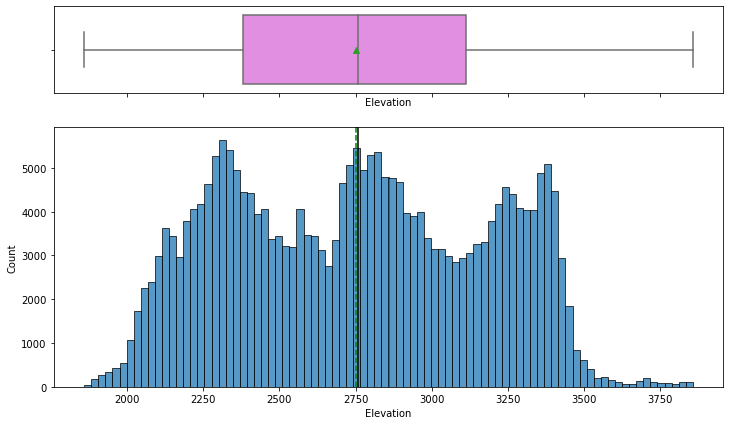

In [36]:
histogram_boxplot(df_new, 'Elevation')

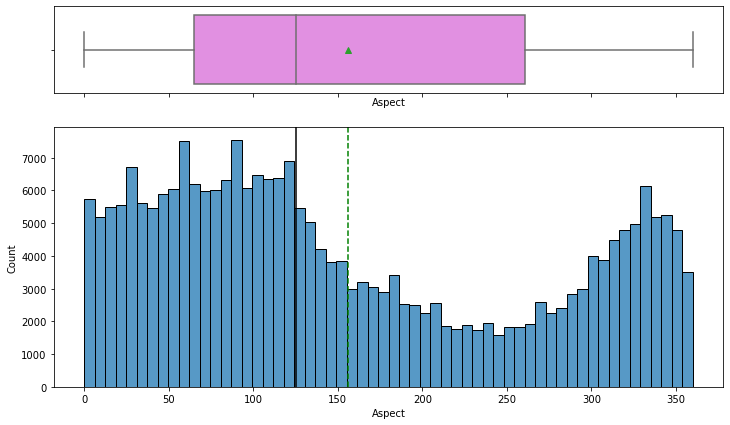

In [37]:
histogram_boxplot(df_new, 'Aspect')

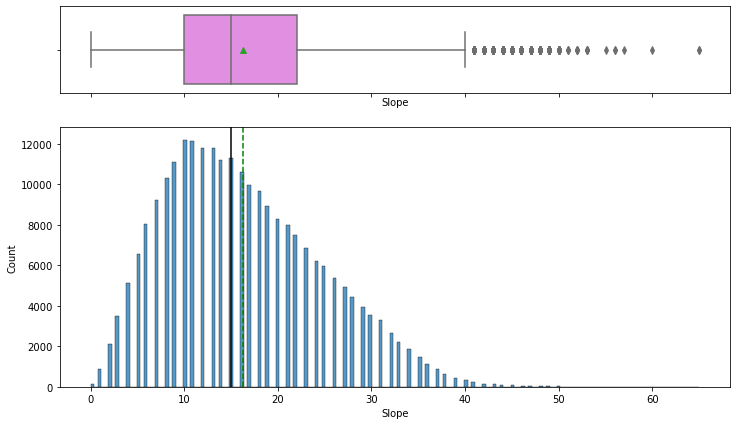

In [38]:
histogram_boxplot(df_new, 'Slope')

In [39]:
IQR=df_new['Slope'].quantile(0.75)-df_new['Slope'].quantile(0.25)
df_new[(df_new['Slope']>(df_new['Slope'].quantile(0.75) + 3*IQR)) |
        (df_new['Slope']<(df_new['Slope'].quantile(0.25) - 3*IQR))]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
105407,3152,107,65,192,-5,3039,210,71,0,1198,2,32,3
136785,2555,3,60,190,135,684,67,53,65,1470,2,10,3
237503,3094,82,65,42,3,3001,193,0,0,1315,2,23,3


In [40]:
df_new['Slope'].quantile(0.75) + 2*IQR

46.0

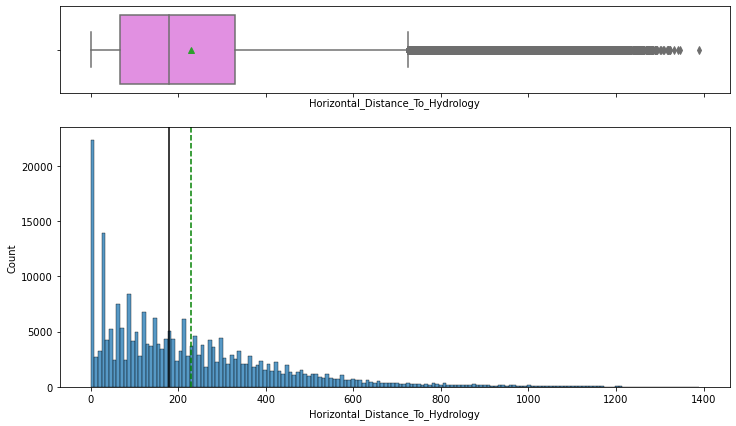

In [41]:
histogram_boxplot(df_new, 'Horizontal_Distance_To_Hydrology')

In [42]:
IQR=df_new['Horizontal_Distance_To_Hydrology'].quantile(0.75)-df_new['Horizontal_Distance_To_Hydrology'].quantile(0.25)
df_new[(df_new['Horizontal_Distance_To_Hydrology']>(df_new['Horizontal_Distance_To_Hydrology'].quantile(0.75) + 3*IQR)) |
        (df_new['Horizontal_Distance_To_Hydrology']<(df_new['Horizontal_Distance_To_Hydrology'].quantile(0.25) - 3*IQR))]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
119,3274,12,25,1130,257,1837,187,182,123,2215,1,24,3
173,3328,173,11,1153,89,2582,227,245,149,2037,7,31,3
1038,3431,291,10,1234,321,3968,192,239,186,2652,7,40,3
1439,3049,41,16,1121,180,2701,221,204,115,1248,2,31,3
1572,3694,8,11,1252,286,5206,206,216,145,3573,7,40,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246429,3391,207,8,1144,189,3097,214,248,169,1287,7,38,3
246934,3307,333,17,1214,290,1910,179,215,174,2031,7,39,3
247165,3298,1,15,1247,281,2078,196,208,147,1939,7,38,3
247364,3399,172,9,1166,179,3015,225,244,150,1449,7,38,3


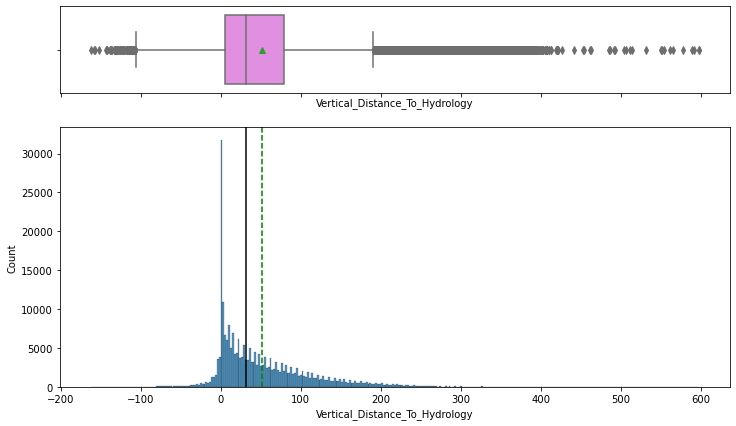

In [43]:
histogram_boxplot(df_new, 'Vertical_Distance_To_Hydrology')

In [44]:
IQR=df_new['Vertical_Distance_To_Hydrology'].quantile(0.75)-df_new['Vertical_Distance_To_Hydrology'].quantile(0.25)
df_new[(df_new['Vertical_Distance_To_Hydrology']>(df_new['Vertical_Distance_To_Hydrology'].quantile(0.75) + 3*IQR)) |
        (df_new['Vertical_Distance_To_Hydrology']<(df_new['Vertical_Distance_To_Hydrology'].quantile(0.25) - 3*IQR))]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
368,2947,294,17,543,313,1448,168,233,204,1761,2,33,3
460,3031,209,31,552,332,2315,182,250,186,1295,2,13,3
601,3805,11,15,1031,396,4643,201,205,138,2742,7,40,3
964,3035,232,21,592,326,2458,181,254,204,1243,2,13,3
1038,3431,291,10,1234,321,3968,192,239,186,2652,7,40,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246631,3768,324,10,901,322,5175,194,229,174,3275,7,40,3
246717,3810,353,13,955,364,4903,196,216,157,2989,7,40,3
246758,3773,312,6,886,327,5149,203,234,171,3244,7,40,3
246961,3438,295,23,1112,310,4155,147,225,215,2617,7,1,3


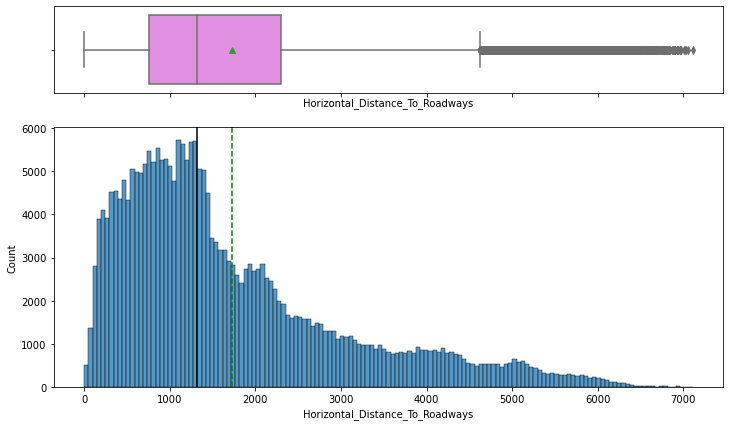

In [45]:
histogram_boxplot(df_new, 'Horizontal_Distance_To_Roadways')

In [46]:
IQR=df_new['Horizontal_Distance_To_Roadways'].quantile(0.75)-df_new['Horizontal_Distance_To_Roadways'].quantile(0.25)
df_new[(df_new['Horizontal_Distance_To_Roadways']>(df_new['Horizontal_Distance_To_Roadways'].quantile(0.75) + 3*IQR)) |
        (df_new['Horizontal_Distance_To_Roadways']<(df_new['Horizontal_Distance_To_Roadways'].quantile(0.25) - 3*IQR))]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
29558,3086,71,10,60,-3,7033,231,221,121,2617,2,20,1
37102,3083,123,10,42,3,6970,237,233,127,2725,2,29,1
79002,3077,77,6,0,0,6964,228,228,134,2647,2,20,1
82504,3080,148,9,30,0,6959,232,240,139,2635,2,20,1
113175,3126,147,15,120,13,6944,239,237,125,2393,2,29,1
131337,3080,6,10,0,0,6964,208,222,150,2792,2,20,1
176568,3090,159,8,67,-2,7009,229,242,145,2557,2,29,1
185760,3086,99,10,95,6,7025,236,227,121,2697,2,29,1
198402,3090,72,6,30,0,7058,227,228,136,2577,2,20,1
221697,3096,77,8,42,3,7112,231,225,127,2510,2,20,1


In [47]:
IQR=df_new['Horizontal_Distance_To_Roadways'].quantile(0.75)-df_new['Horizontal_Distance_To_Roadways'].quantile(0.25)
df_new['Horizontal_Distance_To_Roadways'].quantile(0.75) + 3*IQR

6943.0

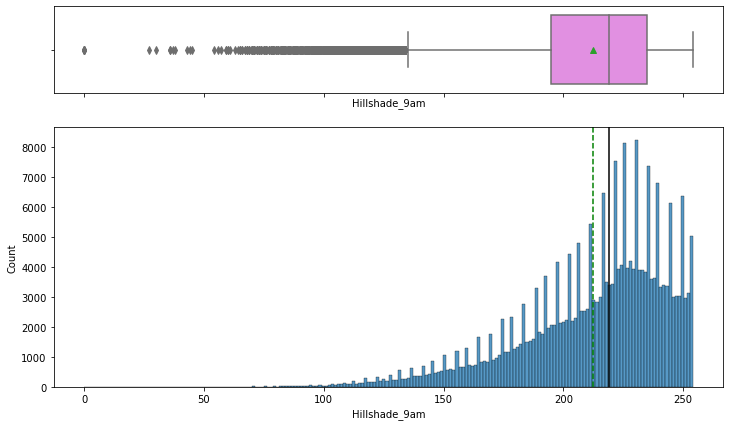

In [48]:
histogram_boxplot(df_new, 'Hillshade_9am')

In [49]:
IQR=df_new['Hillshade_9am'].quantile(0.75)-df_new['Hillshade_9am'].quantile(0.25)
df_new[(df_new['Hillshade_9am']>(df_new['Hillshade_9am'].quantile(0.75) + 2.5*IQR)) |
        (df_new['Hillshade_9am']<(df_new['Hillshade_9am'].quantile(0.25) - 2.5*IQR))]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
855,2258,333,42,112,59,1495,92,149,175,980,3,10,4
1026,1966,300,39,99,70,130,88,191,229,333,3,10,4
1433,2373,308,43,239,146,1266,70,169,217,949,3,10,4
1718,1944,303,39,73,48,105,86,188,226,340,3,10,4
2087,3176,319,40,337,180,550,86,166,201,2092,7,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246730,2299,289,38,124,109,1378,85,201,240,1087,3,10,4
246894,2169,277,38,223,61,606,94,215,245,479,3,10,4
247142,2269,298,40,108,44,1372,79,189,232,1066,3,10,4
247278,2334,328,40,209,111,1309,94,159,184,965,3,10,4


In [50]:
df_new['Hillshade_9am'].quantile(0.25) - 3*IQR

75.0

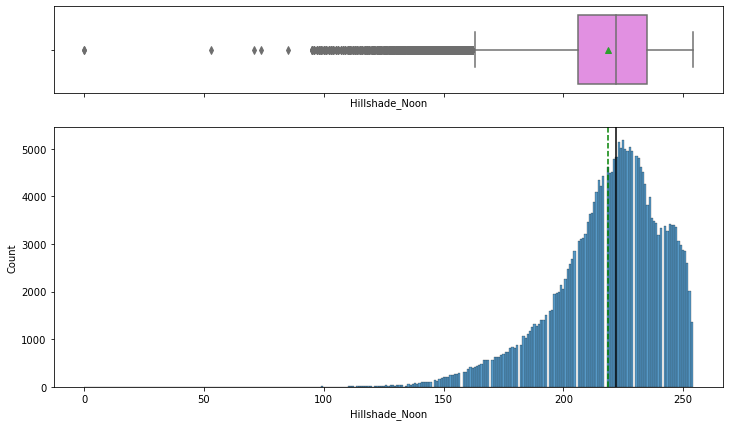

In [51]:
histogram_boxplot(df_new, 'Hillshade_Noon')

In [52]:
IQR=df_new['Hillshade_Noon'].quantile(0.75)-df_new['Hillshade_Noon'].quantile(0.25)
df_new[(df_new['Hillshade_Noon']>(df_new['Hillshade_Noon'].quantile(0.75) + 3*IQR)) |
        (df_new['Hillshade_Noon']<(df_new['Hillshade_Noon'].quantile(0.25) - 3*IQR))]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
589,2723,77,49,106,62,118,222,100,0,1291,5,30,1
3411,2012,46,42,79,59,142,195,116,17,312,3,10,4
3591,2826,72,45,222,72,240,221,109,0,1460,5,30,1
6069,2788,74,46,160,126,173,223,110,0,1358,5,30,1
6489,3414,84,48,335,183,2380,230,110,0,618,7,39,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239029,2165,32,41,92,64,484,175,117,43,328,6,10,4
239652,2796,352,48,268,41,1061,94,111,122,1034,1,31,3
244495,2219,31,42,134,105,509,171,111,39,323,6,10,4
245068,2190,26,42,170,56,626,163,114,53,508,3,10,4


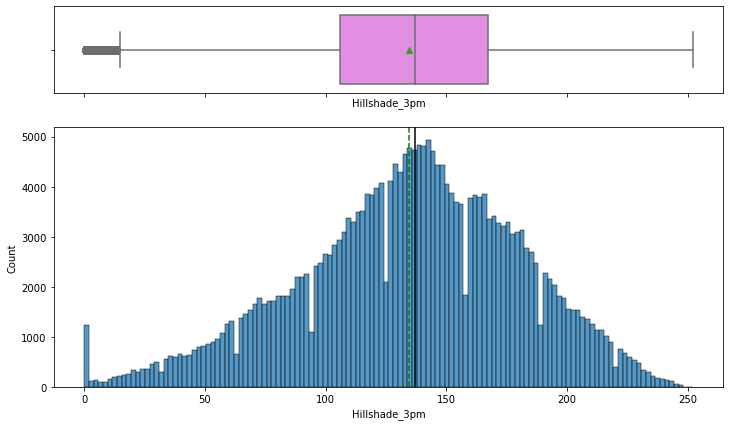

In [53]:
histogram_boxplot(df_new, 'Hillshade_3pm')

In [54]:
IQR=df_new['Hillshade_3pm'].quantile(0.75)-df_new['Hillshade_3pm'].quantile(0.25)
df_new[(df_new['Hillshade_3pm']>(df_new['Hillshade_3pm'].quantile(0.75) + 3*IQR)) |
        (df_new['Hillshade_3pm']<(df_new['Hillshade_3pm'].quantile(0.25) - 3*IQR))]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area


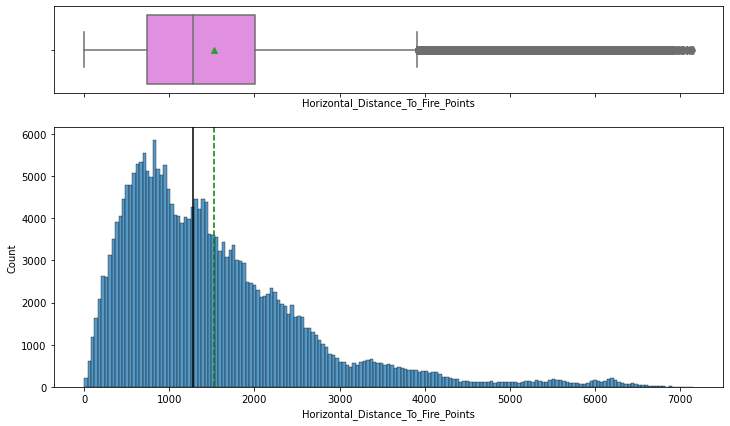

In [55]:
histogram_boxplot(df_new, 'Horizontal_Distance_To_Fire_Points')

In [56]:
IQR=df_new['Horizontal_Distance_To_Fire_Points'].quantile(0.75)-df_new['Horizontal_Distance_To_Fire_Points'].quantile(0.25)
df_new[(df_new['Horizontal_Distance_To_Fire_Points']>(df_new['Horizontal_Distance_To_Fire_Points'].quantile(0.75) + 3*IQR)) |
        (df_new['Horizontal_Distance_To_Fire_Points']<(df_new['Horizontal_Distance_To_Fire_Points'].quantile(0.25) - 3*IQR))]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
14,2724,146,16,30,0,2356,240,236,121,6534,2,12,1
40,2613,196,4,191,52,721,218,243,160,6226,5,18,1
78,2690,340,12,30,7,1879,193,221,167,6430,2,29,1
206,2998,81,12,108,13,2850,237,218,110,6466,1,29,1
334,2968,348,7,120,19,4715,207,229,160,5874,2,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246483,2732,329,19,134,101,2534,172,214,180,6782,2,29,1
246580,2670,130,25,30,3,3067,251,217,78,6241,2,30,1
246721,3014,174,20,85,13,3415,227,246,141,5925,2,29,1
247122,2713,118,29,42,14,3334,254,198,49,6013,5,30,1


### Deal with Outliers

#### *ii. Drop Outliers*

In [57]:
df_new.shape

(247479, 13)

In [58]:
IQR=df_new['Slope'].quantile(0.75)-df_new['Slope'].quantile(0.25)
df_new = df_new[(df_new['Slope']<=(df_new['Slope'].quantile(0.75) + 3*IQR)) &
                (df_new['Slope']>=(df_new['Slope'].quantile(0.25) - 3*IQR))]

In [59]:
df_new.shape

(247476, 13)

In [60]:
IQR=df_new['Horizontal_Distance_To_Hydrology'].quantile(0.75)-df_new['Horizontal_Distance_To_Hydrology'].quantile(0.25)
df_new = df_new[(df_new['Horizontal_Distance_To_Hydrology']<=(df_new['Horizontal_Distance_To_Hydrology'].quantile(0.75) + 3*IQR)) &
                (df_new['Horizontal_Distance_To_Hydrology']>=(df_new['Horizontal_Distance_To_Hydrology'].quantile(0.25) - 3*IQR))]

In [61]:
df_new.shape

(246714, 13)

In [62]:
IQR=df_new['Vertical_Distance_To_Hydrology'].quantile(0.75)-df_new['Vertical_Distance_To_Hydrology'].quantile(0.25)
df_new = df_new[(df_new['Vertical_Distance_To_Hydrology']<=(df_new['Vertical_Distance_To_Hydrology'].quantile(0.75) + 3*IQR)) &
        (df_new['Vertical_Distance_To_Hydrology']>=(df_new['Vertical_Distance_To_Hydrology'].quantile(0.25) - 3*IQR))]

In [63]:
df_new.shape

(245945, 13)

In [64]:
IQR=df_new['Horizontal_Distance_To_Roadways'].quantile(0.75)-df_new['Horizontal_Distance_To_Roadways'].quantile(0.25)
df_new = df_new[(df_new['Horizontal_Distance_To_Roadways']<=(df_new['Horizontal_Distance_To_Roadways'].quantile(0.75) + 3*IQR)) &
                (df_new['Horizontal_Distance_To_Roadways']>=(df_new['Horizontal_Distance_To_Roadways'].quantile(0.25) - 3*IQR))]

In [65]:
df_new.shape

(245924, 13)

In [66]:
IQR=df_new['Hillshade_9am'].quantile(0.75)-df_new['Hillshade_9am'].quantile(0.25)
df_new = df_new[(df_new['Hillshade_9am']<=(df_new['Hillshade_9am'].quantile(0.75) + 2.5*IQR)) &
                (df_new['Hillshade_9am']>=(df_new['Hillshade_9am'].quantile(0.25) - 2.5*IQR))]

In [67]:
df_new.shape

(245525, 13)

In [68]:
IQR=df_new['Hillshade_Noon'].quantile(0.75)-df_new['Hillshade_Noon'].quantile(0.25)
df_new = df_new[(df_new['Hillshade_Noon']<=(df_new['Hillshade_Noon'].quantile(0.75) + 3*IQR)) &
                (df_new['Hillshade_Noon']>=(df_new['Hillshade_Noon'].quantile(0.25) - 3*IQR))]

In [69]:
df_new.shape

(245277, 13)

In [70]:
IQR=df_new['Horizontal_Distance_To_Fire_Points'].quantile(0.75)-df_new['Horizontal_Distance_To_Fire_Points'].quantile(0.25)
df_new = df_new[(df_new['Horizontal_Distance_To_Fire_Points']<=(df_new['Horizontal_Distance_To_Fire_Points'].quantile(0.75) + 3*IQR)) &
                (df_new['Horizontal_Distance_To_Fire_Points']>=(df_new['Horizontal_Distance_To_Fire_Points'].quantile(0.25) - 3*IQR))]

In [71]:
df_new.shape

(242866, 13)

### Now, let's take a closer look at correlation of continuous columns.

<AxesSubplot:>

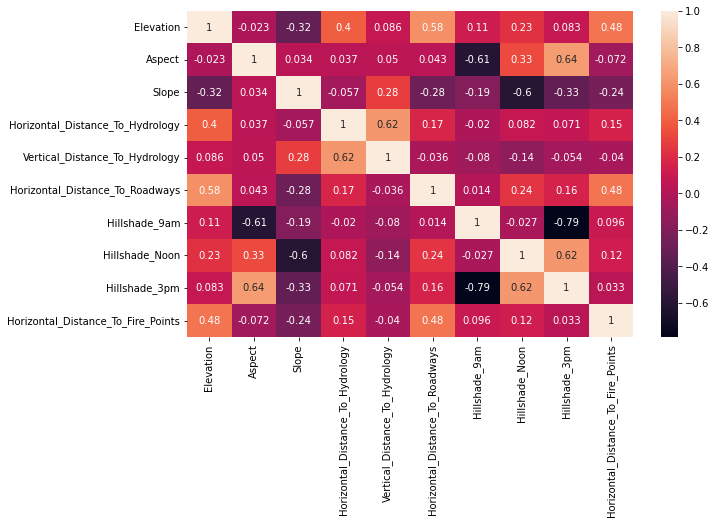

In [72]:
sns.heatmap(df_new[numerical].corr(), annot=True)

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [73]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [74]:
X = df_new.drop('Cover_Type', axis=1)
y = df_new['Cover_Type']

In [75]:
cat = ['Soil_Type','Wilderness_Area']

In [76]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area
0,2696,123,10,212,48,2245,237,231,123,2113,9.000,2.000
1,3269,110,19,134,40,3734,249,216,88,3960,37.000,0.000
2,3283,322,18,346,104,4369,170,217,185,1330,37.000,0.000
3,2847,89,31,270,175,1320,248,173,29,889,12.000,2.000
4,3248,93,12,507,118,570,239,221,110,945,30.000,2.000


### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=101)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (170006, 12)
Train target shape   :  (170006,)
Test features shape  :  (72860, 12)
Test target shape    :  (72860,)


### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

In [79]:
scaler = MinMaxScaler()

In [80]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
from sklearn.svm import SVC

In [82]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [83]:
svm_model = SVC()

In [84]:
svm_model.fit(X_train_scaled, y_train)

SVC()

In [85]:
y_pred = svm_model.predict(X_test_scaled)

In [86]:
svc_f1 = f1_score(y_test, y_pred, average='weighted')

In [87]:
svc_recall = recall_score(y_test, y_pred, average='micro')

In [88]:
svc_auc = roc_auc_score(y_test, y_pred, multi_class='ovo')

AxisError: axis 1 is out of bounds for array of dimension 1

In [89]:
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[7624 1662    9    0  366   46  850]
 [1992 6172  234    2 1291  347   45]
 [   0   33 7229  864  216 2128    0]
 [   0    0  227 9919    0  179    0]
 [  19  501  309    0 9364  213    0]
 [   0   73 1697  584  207 8156    0]
 [ 538    3    0    0    4    0 9757]]
              precision    recall  f1-score   support

           1       0.75      0.72      0.74     10557
           2       0.73      0.61      0.67     10083
           3       0.74      0.69      0.72     10470
           4       0.87      0.96      0.91     10325
           5       0.82      0.90      0.86     10406
           6       0.74      0.76      0.75     10717
           7       0.92      0.95      0.93     10302

    accuracy                           0.80     72860
   macro avg       0.80      0.80      0.80     72860
weighted avg       0.80      0.80      0.80     72860


Train_Set
[[18097  3552     7     0   834    93  1957]
 [ 4696 14940   511    12  2946   841   150]
 [    0    69 16788  2156 

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [91]:
dt_model = DecisionTreeClassifier(random_state=101)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [92]:
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 8971  1268    10     0    57     6   245]
 [ 1255  8254   139     1   265   142    27]
 [    1    89  9737   130    34   479     0]
 [    0     0    85 10206     0    34     0]
 [   28   128    28     0 10205    17     0]
 [    5    53   414    79    10 10156     0]
 [  139    20     0     0     0     0 10143]]
              precision    recall  f1-score   support

           1       0.86      0.85      0.86     10557
           2       0.84      0.82      0.83     10083
           3       0.94      0.93      0.93     10470
           4       0.98      0.99      0.98     10325
           5       0.97      0.98      0.97     10406
           6       0.94      0.95      0.94     10717
           7       0.97      0.98      0.98     10302

    accuracy                           0.93     72860
   macro avg       0.93      0.93      0.93     72860
weighted avg       0.93      0.93      0.93     72860


Train_Set
[[24540     0     0     0     0     0     0]
 [    0 24096     0   

In [93]:
y_pred = dt_model.predict(X_test)

In [94]:
dt_f1 = f1_score(y_test, y_pred, average='weighted')
dt_recall = recall_score(y_test, y_pred, average='micro')

In [95]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [96]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.926
test_precision_micro   0.926
test_recall_micro      0.926
test_f1_micro          0.926
dtype: float64

In [97]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

,Feature Importance
Elevation,0.407
Horizontal_Distance_To_Fire_Points,0.109
Horizontal_Distance_To_Roadways,0.108
Soil_Type,0.086
Horizontal_Distance_To_Hydrology,0.066
Hillshade_9am,0.055
Aspect,0.038
Vertical_Distance_To_Hydrology,0.036
Hillshade_Noon,0.030
Wilderness_Area,0.029


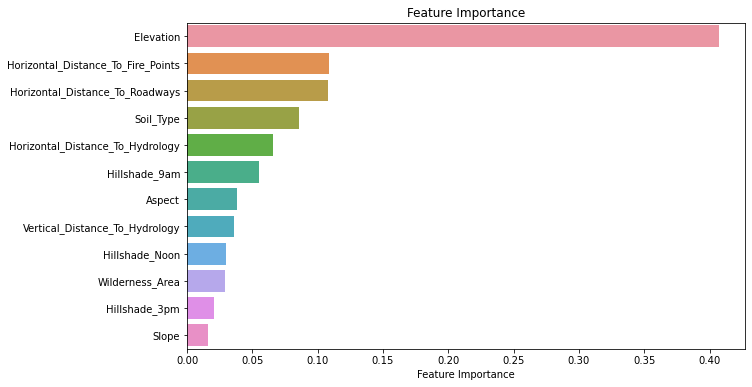

In [98]:
sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 9543   770     6     0    57    13   168]
 [  749  8911   132     0   153   124    14]
 [    0    13 10134   102     7   214     0]
 [    0     0     7 10311     0     7     0]
 [    1    19    14     0 10370     2     0]
 [    0     5   121    53     5 10533     0]
 [   41     2     0     0     0     0 10259]]
              precision    recall  f1-score   support

           1       0.92      0.90      0.91     10557
           2       0.92      0.88      0.90     10083
           3       0.97      0.97      0.97     10470
           4       0.99      1.00      0.99     10325
           5       0.98      1.00      0.99     10406
           6       0.97      0.98      0.97     10717
           7       0.98      1.00      0.99     10302

    accuracy                           0.96     72860
   macro avg       0.96      0.96      0.96     72860
weighted avg       0.96      0.96      0.96     72860


Train_Set
[[24540     0     0     0     0     0     0]
 [    0 24096     0   

In [101]:
y_pred = rf_model.predict(X_test)

In [102]:
rf_f1 = f1_score(y_test, y_pred, average='weighted')
rf_recall = recall_score(y_test, y_pred, average='micro')

In [103]:
model = RandomForestClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.959
test_precision_micro   0.959
test_recall_micro      0.959
test_f1_micro          0.959
dtype: float64

In [104]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
Elevation,0.269
Soil_Type,0.159
Horizontal_Distance_To_Roadways,0.111
Horizontal_Distance_To_Fire_Points,0.091
Horizontal_Distance_To_Hydrology,0.068
Wilderness_Area,0.066
Vertical_Distance_To_Hydrology,0.050
Hillshade_9am,0.048
Aspect,0.042
Hillshade_Noon,0.036


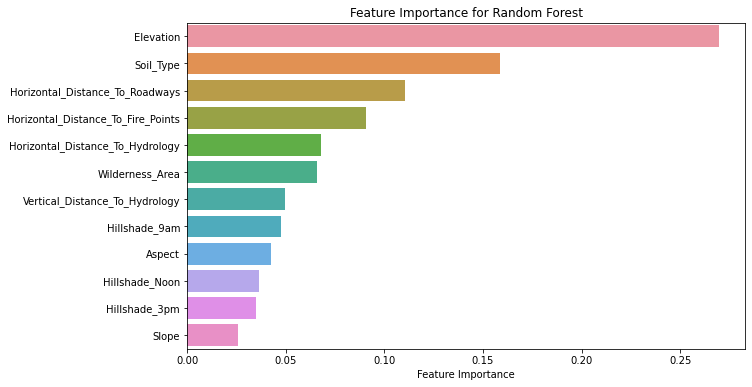

In [105]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [106]:
from xgboost import XGBClassifier

In [107]:
xgb = XGBClassifier(random_state=42)

In [108]:
xgb.fit(X_train, y_train)

[19:12:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [109]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[ 8873  1265     6     0   113    11   289]
 [ 1496  7786   165     1   437   174    24]
 [    0    17  9554   138    41   720     0]
 [    0     0    26 10283     0    16     0]
 [    0    96    31     0 10246    33     0]
 [    0    19   340    67    31 10260     0]
 [   87     1     0     0     1     0 10213]]
              precision    recall  f1-score   support

           1       0.85      0.84      0.84     10557
           2       0.85      0.77      0.81     10083
           3       0.94      0.91      0.93     10470
           4       0.98      1.00      0.99     10325
           5       0.94      0.98      0.96     10406
           6       0.91      0.96      0.94     10717
           7       0.97      0.99      0.98     10302

    accuracy                           0.92     72860
   macro avg       0.92      0.92      0.92     72860
weighted avg       0.92      0.92      0.92     72860


Train_Set
[[21728  2225     2     0   186    15   384]
 [ 2867 19821   251   

In [110]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[19:13:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:13:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:14:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:14:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

test_accuracy    NaN
test_precision   NaN
test_recall      NaN
test_f1          NaN
test_roc_auc     NaN
dtype: float64

In [111]:
y_pred = xgb.predict(X_test)

In [112]:
xgb_f1 = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='micro')

In [113]:
xgb_feature_imp = pd.DataFrame(index = X.columns, data = xgb.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
xgb_feature_imp

,Feature Importance
Elevation,0.305
Soil_Type,0.179
Wilderness_Area,0.132
Hillshade_9am,0.092
Horizontal_Distance_To_Hydrology,0.057
Horizontal_Distance_To_Fire_Points,0.043
Horizontal_Distance_To_Roadways,0.042
Hillshade_Noon,0.040
Aspect,0.036
Vertical_Distance_To_Hydrology,0.030


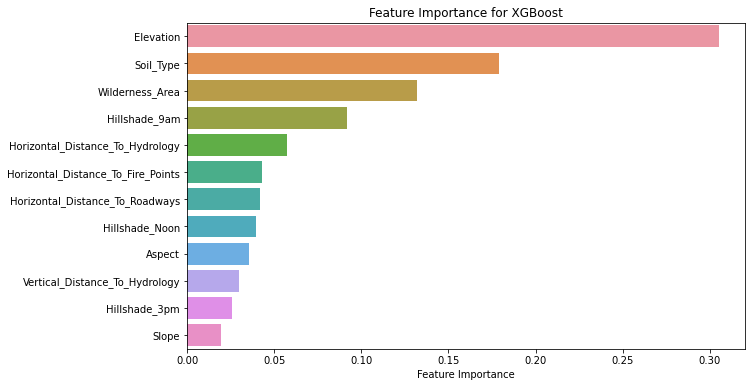

In [114]:
ax = sns.barplot(x=xgb_feature_imp["Feature Importance"], y=xgb_feature_imp.index)
plt.title("Feature Importance for XGBoost")
plt.show()

In [115]:
# Grid Search for XGBoost

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

In [118]:
xgb_model = XGBClassifier(random_state=101)

In [119]:
# grid_model = GridSearchCV(estimator=xgb_model,
                          param_grid=param_grid,
                          scoring="f1",
                          cv=10,
                          verbose=2,
                          n_jobs = -1).fit(X_train, y_train)

IndentationError: unexpected indent (3869243597.py, line 2)

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

In [123]:
compare = pd.DataFrame({"Model": ["SVM", "Decision Tree", "Random Forest", "XGBoost"],
                        "F1": [svc_f1, dt_f1, rf_f1 , xgb_f1],
                        "Recall": [svc_recall, dt_recall, rf_recall, xgb_recall]})

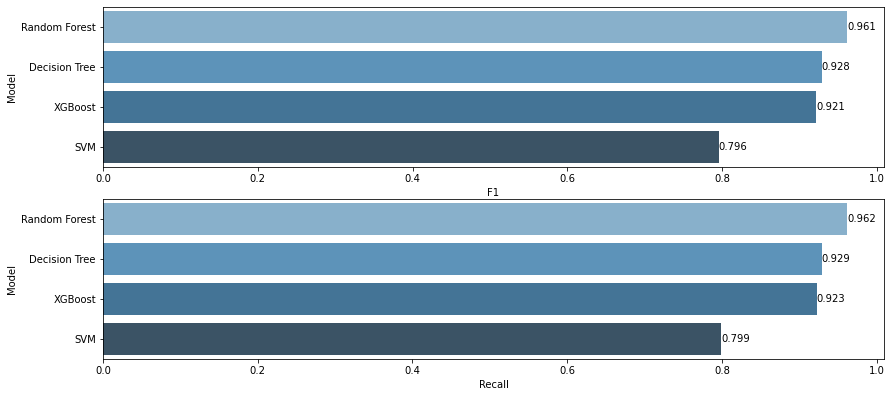

In [124]:
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

#plt.subplot(313)
#compare = compare.sort_values(by="ROC_AUC", ascending=False)
#ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
#labels(ax)
#plt.show()

# Accuracy Comparison

# F1 Score Comparison

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___